In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [5]:
df = pd.read_csv('reddit_preprocessing.csv').dropna(subset=['clean_comment'])
df.head()

,clean_comment,category
0,"film absolutely awful, but nevertheless, hilar...",0
1,well since seeing part 1 3 honestly say never ...,0
2,got see film preview dazzled it. not typical r...,1
3,adaptation positively butcher classic beloved ...,0
4,rzone awful movie! simple. seems tried make mo...,0


In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_comment'], 
    df['category'], 
    test_size=0.2, 
    random_state=42, 
    stratify=df['category']
)

In [7]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [8]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter=500, solver='saga')

# Hyperparameter space
param_dist = {
    'C': np.logspace(-3, 3, 10),
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'l1_ratio': np.linspace(0, 1, 5)  # Only used if penalty='elasticnet'
}

# Random Search
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1_macro',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_vec, y_train)

print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'penalty': 'elasticnet', 'l1_ratio': np.float64(0.0), 'C': np.float64(0.46415888336127775)}


In [9]:
# Best model
best_model = random_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test_vec)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8846
Precision: 0.8848
Recall: 0.8845
F1-score: 0.8845

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      2486
           1       0.88      0.90      0.89      2495

    accuracy                           0.88      4981
   macro avg       0.88      0.88      0.88      4981
weighted avg       0.88      0.88      0.88      4981



In [10]:
df = pd.read_csv('reddit_preprocessing.csv').dropna(subset=['clean_comment'])
df.head()

,clean_comment,category
0,"film absolutely awful, but nevertheless, hilar...",0
1,well since seeing part 1 3 honestly say never ...,0
2,got see film preview dazzled it. not typical r...,1
3,adaptation positively butcher classic beloved ...,0
4,rzone awful movie! simple. seems tried make mo...,0


In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_comment'], 
    df['category'], 
    test_size=0.2, 
    random_state=42, 
    stratify=df['category']
)

In [12]:
X_train.shape

(19923,)

In [13]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [14]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter=500, solver='saga')

# Hyperparameter space
param_dist = {
    'C': np.logspace(-3, 3, 10),
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'l1_ratio': np.linspace(0, 1, 5)  # Only used if penalty='elasticnet'
}

# Random Search
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1_macro',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_vec, y_train)

print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'penalty': 'elasticnet', 'l1_ratio': np.float64(0.0), 'C': np.float64(0.46415888336127775)}


In [15]:
# Best model
best_model = random_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test_vec)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8848
Precision: 0.8849
Recall: 0.8847
F1-score: 0.8847

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      2486
           1       0.88      0.90      0.89      2495

    accuracy                           0.88      4981
   macro avg       0.88      0.88      0.88      4981
weighted avg       0.88      0.88      0.88      4981



In [30]:
df = pd.read_csv('reddit_preprocessing.csv').dropna(subset=['clean_comment'])
df.head()

,clean_comment,category
0,"film absolutely awful, but nevertheless, hilar...",0
1,well since seeing part 1 3 honestly say never ...,0
2,got see film preview dazzled it. not typical r...,1
3,adaptation positively butcher classic beloved ...,0
4,rzone awful movie! simple. seems tried make mo...,0


In [31]:
# Assuming your dataframe is df and the target column is 'category'
X = df['clean_comment']  # Features (text)
y = df['category']       # Target

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)

(19923,) (4981,)


In [32]:
ngram_options = [(1,1), (1,2), (1,3)]
results = []

for ngram in ngram_options:
    print(f"Training for ngram_range={ngram}")
    
    # Vectorization
    vectorizer = TfidfVectorizer(ngram_range=ngram, max_features=5000)
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    
    # Logistic Regression + RandomizedSearch
    param_dist = {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs'],
        'max_iter': [100, 200, 300]
    }
    
    clf = LogisticRegression(random_state=42)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    random_search = RandomizedSearchCV(
        clf, param_distributions=param_dist, n_iter=5,
        scoring='f1_macro', n_jobs=-1, cv=cv, random_state=42, verbose=0
    )
    
    random_search.fit(X_train_vec, y_train)
    
    # Predictions
    y_pred = random_search.predict(X_test_vec)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Store results with vectorizer and model
    results.append({
        'ngram': ngram,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'best_params': random_search.best_params_,
        'model': random_search.best_estimator_,
        'vectorizer': vectorizer   
    })

Training for ngram_range=(1, 1)
Training for ngram_range=(1, 2)
Training for ngram_range=(1, 3)


Best ngram: (1, 3)
Accuracy: 0.8891788797430235
Precision: 0.8892671284238705
Recall: 0.8891654588339994
F1-score: 0.8891698338816436
Best Params: {'solver': 'lbfgs', 'max_iter': 200, 'C': 1}


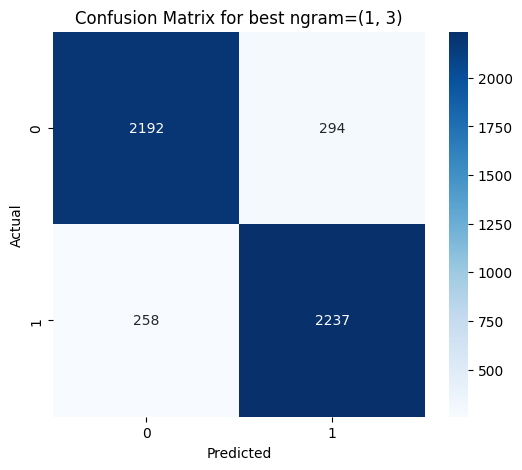

In [33]:
results_df = pd.DataFrame(results)
best_idx = results_df['f1'].idxmax()
best_result = results[best_idx]

print("Best ngram:", best_result['ngram'])
print("Accuracy:", best_result['accuracy'])
print("Precision:", best_result['precision'])
print("Recall:", best_result['recall'])
print("F1-score:", best_result['f1'])
print("Best Params:", best_result['best_params'])

X_test_vec_best = best_result['vectorizer'].transform(X_test)
y_pred_best = best_result['model'].predict(X_test_vec_best)

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix for best ngram={best_result['ngram']}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [37]:
df = pd.read_csv('reddit_preprocessing.csv').dropna(subset=['clean_comment'])
df.head()

,clean_comment,category
0,"film absolutely awful, but nevertheless, hilar...",0
1,well since seeing part 1 3 honestly say never ...,0
2,got see film preview dazzled it. not typical r...,1
3,adaptation positively butcher classic beloved ...,0
4,rzone awful movie! simple. seems tried make mo...,0


In [38]:
# Assuming your dataframe is df with columns: 'clean_comment', 'category'
X = df['clean_comment']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [43]:
def run_experiment(vectorizer_type, ngram_range, max_features=5000):
    # Vectorization
    if vectorizer_type == "BoW":
        vectorizer = CountVectorizer(ngram_range=ngram_range, max_features=max_features)
    else:
        vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=max_features)

    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Logistic Regression + RandomizedSearchCV
    param_dist = {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs'],
        'max_iter': [100, 200, 300]
    }

    clf = LogisticRegression(random_state=42)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    random_search = RandomizedSearchCV(
        clf, param_distributions=param_dist, n_iter=5,
        scoring='f1_macro', n_jobs=-1, cv=cv, random_state=42, verbose=1
    )

    random_search.fit(X_train_vec, y_train)

    # Predictions
    y_pred = random_search.predict(X_test_vec)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {vectorizer_type} {ngram_range}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Save model and vectorizer
    model_filename = f'logreg_{vectorizer_type}_{ngram_range}.pkl'
    vectorizer_filename = f'vectorizer_{vectorizer_type}_{ngram_range}.pkl'

    with open(model_filename, 'wb') as f:
        pickle.dump(random_search.best_estimator_, f)
    with open(vectorizer_filename, 'wb') as f:
        pickle.dump(vectorizer, f)

    # Return results
    return {
        'vectorizer_type': vectorizer_type,
        'ngram_range': ngram_range,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'best_params': random_search.best_params_
    }



Running experiment: BoW with ngram (1, 1)
Fitting 5 folds for each of 5 candidates, totalling 25 fits


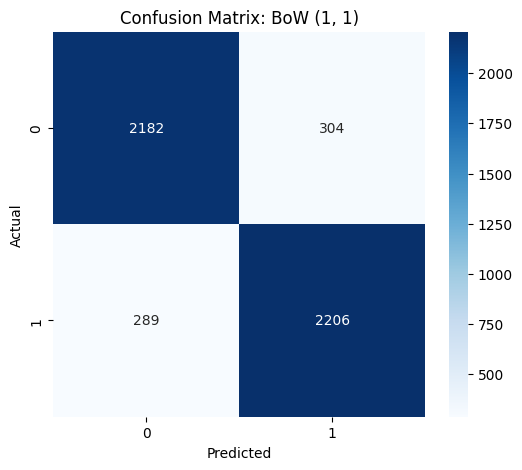

Running experiment: BoW with ngram (1, 2)
Fitting 5 folds for each of 5 candidates, totalling 25 fits


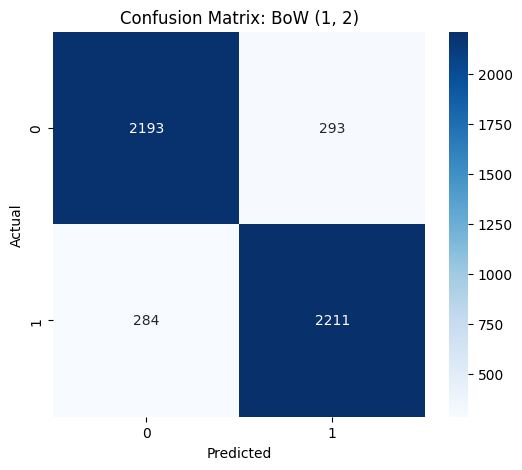

Running experiment: BoW with ngram (1, 3)
Fitting 5 folds for each of 5 candidates, totalling 25 fits


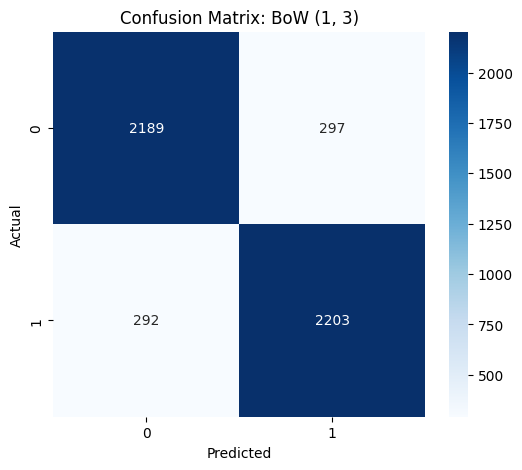

Running experiment: TF-IDF with ngram (1, 1)
Fitting 5 folds for each of 5 candidates, totalling 25 fits


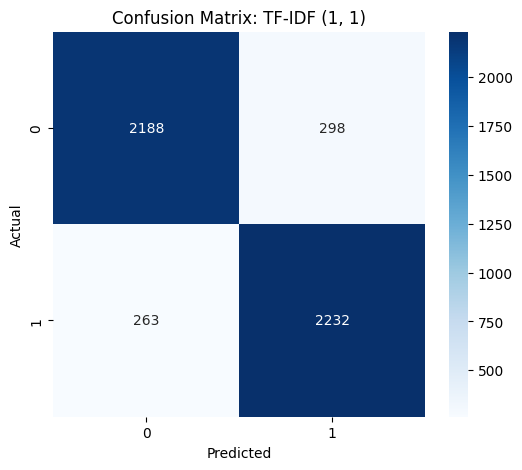

Running experiment: TF-IDF with ngram (1, 2)
Fitting 5 folds for each of 5 candidates, totalling 25 fits


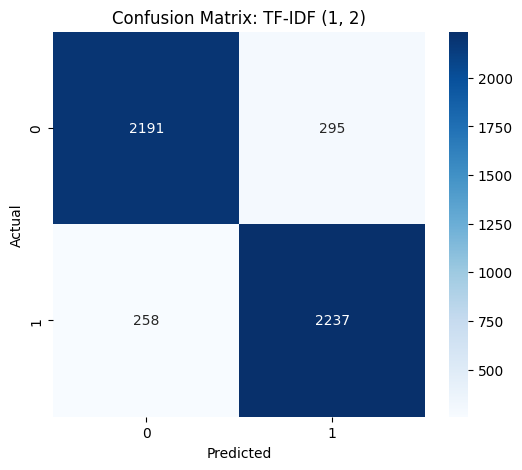

Running experiment: TF-IDF with ngram (1, 3)
Fitting 5 folds for each of 5 candidates, totalling 25 fits


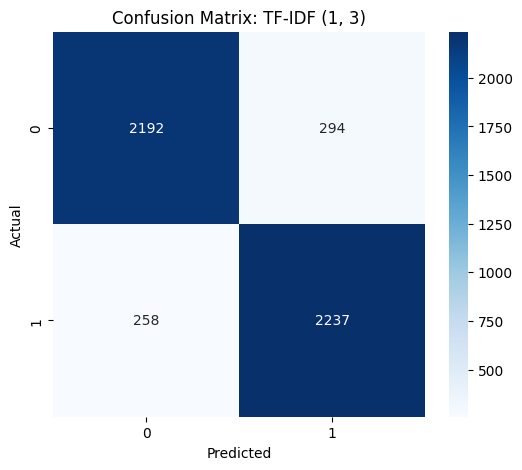

In [44]:
ngram_options = [(1,1), (1,2), (1,3)]  # unigrams, bigrams, trigrams
vectorizers = ["BoW", "TF-IDF"]

results = []

for vec in vectorizers:
    for ngram in ngram_options:
        print(f"Running experiment: {vec} with ngram {ngram}")
        result = run_experiment(vec, ngram, max_features=5000)
        results.append(result)

In [45]:
results_df = pd.DataFrame(results)
best_idx = results_df['f1'].idxmax()
best_result = results_df.loc[best_idx]

print("\nBest Result:")
print(best_result)


Best Result:
vectorizer_type                                          TF-IDF
ngram_range                                              (1, 3)
accuracy                                               0.889179
precision                                              0.889267
recall                                                 0.889165
f1                                                      0.88917
best_params        {'solver': 'lbfgs', 'max_iter': 200, 'C': 1}
Name: 5, dtype: object


In [47]:
vectorizer_type = best_result['vectorizer_type']
ngram_range = best_result['ngram_range']

model_filename = f'logreg_{vectorizer_type}_{ngram_range}.pkl'
vectorizer_filename = f'vectorizer_{vectorizer_type}_{ngram_range}.pkl'

with open(model_filename, 'rb') as f:
    model_best = pickle.load(f)

with open(vectorizer_filename, 'rb') as f:
    vectorizer_best = pickle.load(f)

new_text = ["Be very afraid of anyone who likes this film. They probably inhaled too many paint chips as a child. Its so awful I refuse to relive a plot. O yeah, there wasn't one! This movie is a true definition of what Hollywood creates for people who don't want to think at a theatre. Do the bad guys win? Do the good guys win? Who cares!"]

new_text_vec = vectorizer_best.transform(new_text)

# Predict
prediction = model_best.predict(new_text_vec)
print("Predicted category:", prediction[0])

Predicted category: 0
